South Australian Crime Data Vs Median Property Prices (BY SUBURB)

In [1]:
!pip install datetime

In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [3]:
## MERGE 5 financial year csvs (July 2014 to June 2020)
# 2015-16_crime.csv
# 2016-17_crime.csv
# 2017-18_crime.csv
# 2018-19_crime.csv
# 2019-20_crime.csv

#Read csv "2015-16_crime.csv"
y15_crime=pd.read_csv("Resources/2015-16_crime.csv")
y15_crime.head()

#Read csv "2016-17_crime.csv"
y16_crime=pd.read_csv("Resources/2016-17_crime.csv")
y16_crime.head()

#Read csv "2017-18_crime.csv"
y17_crime=pd.read_csv("Resources/2017-18_crime.csv")
y17_crime.head()

#Read csv "2018-19_crime.csv"
y18_crime=pd.read_csv("Resources/2018-19_crime.csv")
y18_crime.head()

#Read csv "2019-20_crime.csv"
y19_crime=pd.read_csv("Resources/2019-20_crime.csv")
y19_crime.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,01/07/2019,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,1
1,01/07/2019,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,"Other fraud, deception and related offences",1
2,01/07/2019,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Graffiti,1
3,01/07/2019,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2
4,01/07/2019,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6


In [4]:
#Concatonate all the 5 csv files for 5 consecutive years 
y15_16_crime=pd.concat([y15_crime, y16_crime], sort=False)
y15_16_crime

y15_16_17_crime=pd.concat([y15_16_crime, y17_crime], sort=False)
y15_16_17_crime

y15_16_17_18_crime=pd.concat([y15_16_17_crime, y18_crime], sort=False)
y15_16_17_18_crime

y15_16_17_18_19_crime=pd.concat([y15_16_17_18_crime, y19_crime], sort=False)
y15_16_17_18_19_crime

#Crime Data Merged, dataframe: "crime_data"
crime_data=y15_16_17_18_19_crime
crime_data

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2015,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,2.0
1,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,1.0
2,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
3,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,9.0
4,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
...,...,...,...,...,...,...,...
95697,30/06/2020,WEST LAKES,5021,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,1.0
95698,30/06/2020,WHYALLA NORRIE,5608,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0
95699,30/06/2020,WOODVILLE NORTH,5012,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,2.0
95700,30/06/2020,NaN,NaN,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0


In [5]:
#Drop NaN rows
crime_data=crime_data.dropna()
crime_data

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2015,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,2.0
1,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,1.0
2,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
3,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,9.0
4,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
...,...,...,...,...,...,...,...
95695,30/06/2020,WESTBOURNE PARK,5041,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
95696,30/06/2020,WEST HINDMARSH,5007,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0
95697,30/06/2020,WEST LAKES,5021,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,1.0
95698,30/06/2020,WHYALLA NORRIE,5608,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0


In [6]:
#Check unique descriptionws for 'Offence Level 1 Description'
crime_data["Offence Level 1 Description"].unique()

array(['OFFENCES AGAINST PROPERTY', 'OFFENCES AGAINST THE PERSON'],
      dtype=object)

In [7]:
#Removing rows which contains "OFFENCES AGAINST THE PERSON" in Offence Level 1 Description. 
# *Group is looking into specifically 'Offences Against Property' only.
crime_data = crime_data[~crime_data["Offence Level 1 Description"].isin(['OFFENCES AGAINST THE PERSON'])]
crime_data

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2015,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,2.0
1,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,1.0
2,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
3,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,9.0
4,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
...,...,...,...,...,...,...,...
95694,30/06/2020,WARRADALE,5046,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2.0
95695,30/06/2020,WESTBOURNE PARK,5041,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
95696,30/06/2020,WEST HINDMARSH,5007,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0
95697,30/06/2020,WEST LAKES,5021,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,1.0


In [8]:
#Check unique descriptionws for 'Offence Level 2 Description'
crime_data["Offence Level 2 Description"].unique()

array(['SERIOUS CRIMINAL TRESPASS',
       'FRAUD DECEPTION AND RELATED OFFENCES',
       'PROPERTY DAMAGE AND ENVIRONMENTAL', 'THEFT AND RELATED OFFENCES'],
      dtype=object)

In [9]:
#Check unique descriptions for 'Offence Level 3 Description'
crime_data["Offence Level 3 Description"].unique()
print(crime_data["Offence Level 3 Description"].value_counts())
#1. Other theft : Description: Theft except motor vehicles
#2. Other property damage and environmental
#3. Theft from motor vehicle
#4. SCT - Residence
#5. Theft/Illegal Use of MV
# - DELETE: Theft from shop
# - DELETE: SCT - Non Residence

#Removing rows which are not intended to be analysed in Offence Level 3 Description
#List out categories keeping in '.isin'
crime_data = crime_data[crime_data["Offence Level 3 Description"].isin(["Other theft","Other property damage and environmental","Theft from motor vehicle","SCT - Residence","Theft/Illegal Use of MV"])]
print(crime_data)
print(crime_data["Offence Level 3 Description"].value_counts())

Other theft                                    90985
Other property damage and environmental        75303
Theft from motor vehicle                       41808
SCT - Residence                                36044
Theft from shop                                35125
SCT - Non Residence                            21139
Theft/Illegal Use of MV                        16883
Other unlawful entry with intent               15091
Obtain benefit by deception                    11548
Graffiti                                        8722
Property damage by fire or explosion            7044
Receive or handle proceeds of crime             6813
Other fraud, deception and related offences     3358
Name: Offence Level 3 Description, dtype: int64
      Reported Date Suburb - Incident Postcode - Incident  \
2         1/07/2015          ADELAIDE                5000   
3         1/07/2015          ADELAIDE                5000   
4         1/07/2015          ADELAIDE                5000   
8         1/07/2015

Binning by Financial Year

In [10]:
#Check dtype info
#crime_data.info()
#Reported Date column has dtype:object. Need to convert to a dtype: datetime64[ns]

#Converts Reported Date column dtype from 'object' to 'datetime65[ns]'. Create a new column 'Formatted Date' to save the date in required format (for binning)
crime_data["Formatted Date"]=pd.to_datetime(crime_data["Reported Date"],format="%d/%m/%Y")
#crime_data.info()

###### Binning each row (crime) into the specific financial year #### 
#Ensure the start and end dates cover the range of all the data. 
start = '2014/6/30'
end='2021/6/30'

# Create bins
#Note: closed=right indicates the start date (left) is not included, but the end date (right) is included.
bins = pd.date_range(start=start, end=end, normalize=True, freq=pd.offsets.MonthEnd(12), closed='right')
crime_data["finan_yr"] = pd.cut(crime_data["Formatted Date"], bins=bins)
crime_data

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Formatted Date,finan_yr
2,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0,2015-07-01,"(2015-06-30, 2016-06-30]"
3,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,9.0,2015-07-01,"(2015-06-30, 2016-06-30]"
4,1/07/2015,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,2015-07-01,"(2015-06-30, 2016-06-30]"
8,1/07/2015,ALBERTON,5014,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,1.0,2015-07-01,"(2015-06-30, 2016-06-30]"
9,1/07/2015,ALBERT PARK,5014,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1.0,2015-07-01,"(2015-06-30, 2016-06-30]"
...,...,...,...,...,...,...,...,...,...
95692,30/06/2020,WALKLEY HEIGHTS,5098,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,2.0,2020-06-30,"(2019-06-30, 2020-06-30]"
95693,30/06/2020,WANDEARAH EAST,5523,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1.0,2020-06-30,"(2019-06-30, 2020-06-30]"
95694,30/06/2020,WARRADALE,5046,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2.0,2020-06-30,"(2019-06-30, 2020-06-30]"
95696,30/06/2020,WEST HINDMARSH,5007,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,2020-06-30,"(2019-06-30, 2020-06-30]"


In [11]:
#Check that there are 5 bins (ie. 5 financial years) in the finan_yr column.
crime_data["finan_yr"].unique()

[(2015-06-30, 2016-06-30], (2016-06-30, 2017-06-30], (2017-06-30, 2018-06-30], (2018-06-30, 2019-06-30], (2019-06-30, 2020-06-30]]
Categories (5, interval[datetime64[ns]]): [(2015-06-30, 2016-06-30] < (2016-06-30, 2017-06-30] < (2017-06-30, 2018-06-30] < (2018-06-30, 2019-06-30] < (2019-06-30, 2020-06-30]]

CLEAN DATAFRAME: crime_data1 
- Financial year column: finan_yr
- Only showing relevant Offence Level 3 Description categories for project: 
#1. Other theft (Theft not including motor vehicles and commercial shops)
#2. Other property damage and environmental
#3. Theft from motor vehicle
#4. SCT - Residence
#5. Theft/Illegal Use of MV

In [12]:
#Final cleaned up dataframe: crime_data1
crime_data1 = crime_data[['finan_yr','Formatted Date','Suburb - Incident','Offence Level 3 Description','Offence count']]
crime_data1

,finan_yr,Formatted Date,Suburb - Incident,Offence Level 3 Description,Offence count
2,"(2015-06-30, 2016-06-30]",2015-07-01,ADELAIDE,Other property damage and environmental,2.0
3,"(2015-06-30, 2016-06-30]",2015-07-01,ADELAIDE,Other theft,9.0
4,"(2015-06-30, 2016-06-30]",2015-07-01,ADELAIDE,Theft from motor vehicle,1.0
8,"(2015-06-30, 2016-06-30]",2015-07-01,ALBERTON,SCT - Residence,1.0
9,"(2015-06-30, 2016-06-30]",2015-07-01,ALBERT PARK,Other theft,1.0
...,...,...,...,...,...
95692,"(2019-06-30, 2020-06-30]",2020-06-30,WALKLEY HEIGHTS,Theft from motor vehicle,2.0
95693,"(2019-06-30, 2020-06-30]",2020-06-30,WANDEARAH EAST,Other theft,1.0
95694,"(2019-06-30, 2020-06-30]",2020-06-30,WARRADALE,Other theft,2.0
95696,"(2019-06-30, 2020-06-30]",2020-06-30,WEST HINDMARSH,Other property damage and environmental,1.0


DATAFRAMES BY FINANCIAL YEAR

In [13]:
# Filtered for finan_yr, dataframe: y15_16, y16_17, y17_18, y18_19 y19_20

#See dtypes for dataframe
crime_data1.info()

#Cast column finan_yr's dtype from category to string for dataframe (to be able to filter later on)
crime_data1["finan_yr"]=crime_data1["finan_yr"].astype(str)

# Check dtype for finan_yr has changed to object (string)
crime_data1.info()

#Create dataframes by financial year (5 financial years total)
y15_16 = crime_data1[crime_data1["finan_yr"].isin(['(2015-06-30, 2016-06-30]'])]
y16_17 = crime_data1[crime_data1["finan_yr"].isin(['(2016-06-30, 2017-06-30]'])]
y17_18 = crime_data1[crime_data1["finan_yr"].isin(['(2017-06-30, 2018-06-30]'])]
y18_19 = crime_data1[crime_data1["finan_yr"].isin(['(2018-06-30, 2019-06-30]'])]
y19_20 = crime_data1[crime_data1["finan_yr"].isin(['(2019-06-30, 2020-06-30]'])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261023 entries, 2 to 95697
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   finan_yr                     261023 non-null  category      
 1   Formatted Date               261023 non-null  datetime64[ns]
 2   Suburb - Incident            261023 non-null  object        
 3   Offence Level 3 Description  261023 non-null  object        
 4   Offence count                261023 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 10.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 261023 entries, 2 to 95697
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   finan_yr                     261023 non-null  object        
 1   Formatted Date               261

ANALYSIS OF DATAFRAME RESULTS

Results by Financial Year

y15_16 

y16_17 

y17_18 

y18_19 

y19_20

In [14]:
#Financial Yr Dataframe: y15_16
## ANALYSIS OF LEVEL 3 CRIME TYPES (OF THE FILTERED CATEGORIES GROUP IS ANALYSING FOR ALL SUBURBS BY FINANCIAL YEAR ####
y15_16 

#Groupby suburb and sum up offence counts
y15_16_crime_suburbs=y15_16.groupby(["Suburb - Incident"]).sum()["Offence count"]
y15_16_crime_suburbs=y15_16_crime_suburbs.reset_index()

#TOP 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y15_16_top10_crime_suburbs=y15_16_crime_suburbs.sort_values(by="Offence count",ascending=False)
y15_16_top10_crime_suburbs=y15_16_top10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y15_16_top10_crime_suburbs}\n")

#BOTTOM 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y15_16_bot10_crime_suburbs=y15_16_crime_suburbs.sort_values(by="Offence count",ascending=True)
y15_16_bot10_crime_suburbs=y15_16_bot10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y15_16_bot10_crime_suburbs}\n")


Top 10 Crime Suburbs
     Suburb - Incident  Offence count
1             ADELAIDE         2460.0
739       PORT AUGUSTA          920.0
572      MORPHETT VALE          906.0
582      MOUNT GAMBIER          868.0
747       PORT LINCOLN          818.0
814          SALISBURY          782.0
603      MURRAY BRIDGE          755.0
206       DAVOREN PARK          699.0
525       MAWSON LAKES          633.0
691  PARAFIELD GARDENS          610.0

Top 10 Crime Suburbs
     Suburb - Incident  Offence count
391           HOYLETON            1.0
664              OLARY            1.0
1029           WOKURNA            1.0
663            OB FLAT            1.0
850          SEVENHILL            1.0
509      MAMBRAY CREEK            1.0
909        TAYLORVILLE            1.0
866           SOUTHEND            1.0
801       ROGUES POINT            1.0
656            NURRAGI            1.0



In [15]:
#Financial Yr Dataframe: y16_17
## ANALYSIS OF LEVEL 3 CRIME TYPES (FOR ALL SUBURBS BY FINANCIAL YEAR) ####
y16_17

#Groupby suburb and sum up offence counts
y16_17_crime_suburbs=y16_17.groupby(["Suburb - Incident"]).sum()["Offence count"]
y16_17_crime_suburbs=y16_17_crime_suburbs.reset_index()

#TOP 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y16_17_top10_crime_suburbs=y16_17_crime_suburbs.sort_values(by="Offence count",ascending=False)
y16_17_top10_crime_suburbs=y16_17_top10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y16_17_top10_crime_suburbs}\n")

#BOTTOM 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y16_17_bot10_crime_suburbs=y16_17_crime_suburbs.sort_values(by="Offence count",ascending=True)
y16_17_bot10_crime_suburbs=y16_17_bot10_crime_suburbs.head(10)
print(f"Bottom 10 Crime Suburbs\n{y16_17_bot10_crime_suburbs}\n")

Top 10 Crime Suburbs
     Suburb - Incident  Offence count
1             ADELAIDE         2545.0
741       PORT AUGUSTA          924.0
605      MURRAY BRIDGE          894.0
579      MORPHETT VALE          853.0
586      MOUNT GAMBIER          801.0
814          SALISBURY          687.0
533       MAWSON LAKES          655.0
750       PORT LINCOLN          635.0
689  PARAFIELD GARDENS          602.0
218       DAVOREN PARK          578.0

Bottom 10 Crime Suburbs
    Suburb - Incident  Offence count
587      MOUNT GEORGE            1.0
892         SUNNYDALE            1.0
478         LAURA BAY            1.0
151       CHERRYVILLE            1.0
152    CHINAMAN WELLS            1.0
480        LEASINGHAM            1.0
896        SUTTONTOWN            1.0
481   LEAWOOD GARDENS            1.0
301            FURNER            1.0
899            TALDRA            1.0



In [16]:
#Financial Yr Dataframe: y17_18
## ANALYSIS OF LEVEL 3 CRIME TYPES (FOR ALL SUBURBS BY FINANCIAL YEAR) ####
y17_18

#Groupby suburb and sum up offence counts
y17_18_crime_suburbs=y17_18.groupby(["Suburb - Incident"]).sum()["Offence count"]
y17_18_crime_suburbs=y17_18_crime_suburbs.reset_index()

#TOP 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y17_18_top10_crime_suburbs=y17_18_crime_suburbs.sort_values(by="Offence count",ascending=False)
y17_18_top10_crime_suburbs=y17_18_top10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y17_18_top10_crime_suburbs}\n")

#BOTTOM 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y17_18_bot10_crime_suburbs=y17_18_crime_suburbs.sort_values(by="Offence count",ascending=True)
y17_18_bot10_crime_suburbs=y17_18_bot10_crime_suburbs.head(10)
print(f"Bottom 10 Crime Suburbs\n{y17_18_bot10_crime_suburbs}\n")

Top 10 Crime Suburbs
     Suburb - Incident  Offence count
1             ADELAIDE         2561.0
584      MORPHETT VALE         1072.0
617      MURRAY BRIDGE          961.0
753       PORT AUGUSTA          755.0
597      MOUNT GAMBIER          748.0
816          SALISBURY          738.0
541       MAWSON LAKES          714.0
762       PORT LINCOLN          646.0
705  PARAFIELD GARDENS          628.0
216       DAVOREN PARK          611.0

Bottom 10 Crime Suburbs
    Suburb - Incident  Offence count
533     MARKS LANDING            1.0
707            PARAWA            1.0
702         PARACOMBE            1.0
701        PARACHILNA            1.0
220          DELAMERE            1.0
684       OODLA WIRRA            1.0
223     DINGABLEDINGA            1.0
677           OB FLAT            1.0
226          DONOVANS            1.0
673        OAK VALLEY            1.0



In [17]:
#Financial Yr Dataframe: y18_19
## ANALYSIS OF LEVEL 3 CRIME TYPES (FOR ALL SUBURBS BY FINANCIAL YEAR) ####
y18_19

#Groupby suburb and sum up offence counts
y18_19_crime_suburbs=y18_19.groupby(["Suburb - Incident"]).sum()["Offence count"]
y18_19_crime_suburbs=y18_19_crime_suburbs.reset_index()

#TOP 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y18_19_top10_crime_suburbs=y18_19_crime_suburbs.sort_values(by="Offence count",ascending=False)
y18_19_top10_crime_suburbs=y18_19_top10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y18_19_top10_crime_suburbs}\n")

#BOTTOM 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y18_19_bot10_crime_suburbs=y18_19_crime_suburbs.sort_values(by="Offence count",ascending=True)
y18_19_bot10_crime_suburbs=y18_19_bot10_crime_suburbs.head(10)
print(f"Bottom 10 Crime Suburbs\n{y18_19_bot10_crime_suburbs}\n")

Top 10 Crime Suburbs
      Suburb - Incident  Offence count
1              ADELAIDE         2869.0
596       MORPHETT VALE         1074.0
627       MURRAY BRIDGE          779.0
774        PORT LINCOLN          733.0
838           SALISBURY          690.0
764        PORT AUGUSTA          685.0
545        MAWSON LAKES          676.0
607       MOUNT GAMBIER          653.0
1042     WHYALLA NORRIE          639.0
713   PARAFIELD GARDENS          578.0

Bottom 10 Crime Suburbs
    Suburb - Incident  Offence count
553           MELROSE            1.0
157          CHOWILLA            1.0
743           PETWOOD            1.0
954          THORNLEA            1.0
949         THE RANGE            1.0
948         THE PINES            1.0
947           THE GAP            1.0
744        PICCADILLY            1.0
406          HOYLETON            1.0
746        PINE POINT            1.0



In [18]:
#Financial Yr Dataframe: y19_20
## ANALYSIS OF LEVEL 3 CRIME TYPES (FOR ALL SUBURBS BY FINANCIAL YEAR) ####
y19_20

#Groupby suburb and sum up offence counts
y19_20_crime_suburbs=y19_20.groupby(["Suburb - Incident"]).sum()["Offence count"]
y19_20_crime_suburbs=y19_20_crime_suburbs.reset_index()

#TOP 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y19_20_top10_crime_suburbs=y19_20_crime_suburbs.sort_values(by="Offence count",ascending=False)
y19_20_top10_crime_suburbs=y19_20_top10_crime_suburbs.head(10)
print(f"Top 10 Crime Suburbs\n{y19_20_top10_crime_suburbs}\n")

#BOTTOM 20 SUBURBS (CHRONOLOGICALLY) WITH HIGHEST CRIME RATES 
y19_20_bot10_crime_suburbs=y19_20_crime_suburbs.sort_values(by="Offence count",ascending=True)
y19_20_bot10_crime_suburbs=y19_20_bot10_crime_suburbs.head(10)
print(f"Bottom 10 Crime Suburbs\n{y19_20_bot10_crime_suburbs}\n")

Top 10 Crime Suburbs
     Suburb - Incident  Offence count
1             ADELAIDE         3216.0
606      MORPHETT VALE         1023.0
790       PORT LINCOLN          871.0
618      MOUNT GAMBIER          829.0
634      MURRAY BRIDGE          766.0
857          SALISBURY          761.0
554       MAWSON LAKES          752.0
781       PORT AUGUSTA          721.0
1060    WHYALLA NORRIE          698.0
805           PROSPECT          678.0

Bottom 10 Crime Suburbs
     Suburb - Incident  Offence count
1122             YUNTA            1.0
870          SANDLETON            1.0
872        SANDY GROVE            1.0
882           SEAL BAY            1.0
886       SECRET ROCKS            1.0
318         GILLENTOWN            1.0
316       GERMAN CREEK            1.0
888             SEDDON            1.0
868        SANDERGROVE            1.0
895      SEPPELTSFIELD            1.0



MATPLOT LIB PLOTS

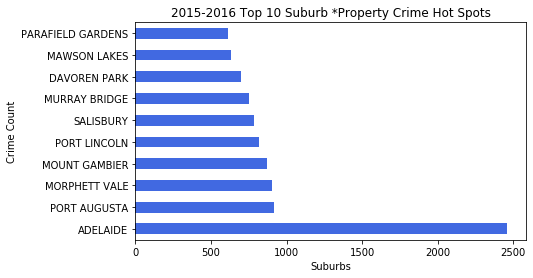

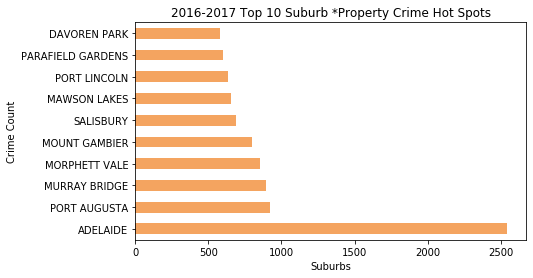

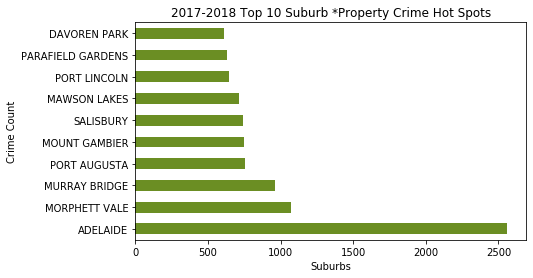

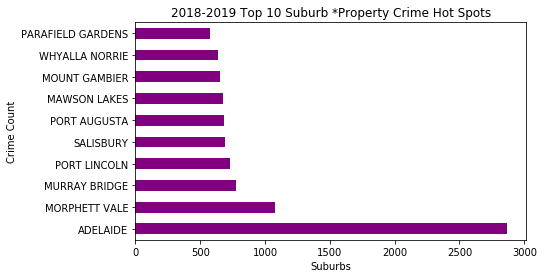

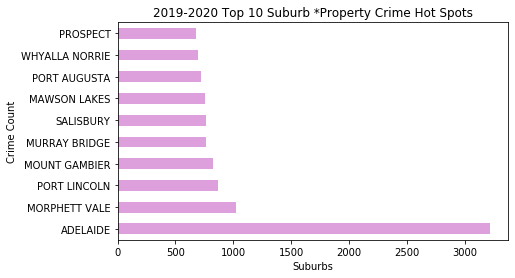

In [43]:
#---------PANDA BAR CHART ------------

y15_16_top10_crime_suburbs.plot(kind="barh", figsize=(7,4), x='Suburb - Incident', color="royalblue", rot=0, legend=False)
# Set a title for the chart
plt.title("2015-2016 Top 10 Suburb *Property Crime Hot Spots")
plt.xlabel("Suburbs")
plt.ylabel("Crime Count")

#Use DataFrame.plot() in order to create a bar chart of the data
# y15_16_top10_crime_suburbs.plot(kind="bar",figsize=(7,4), rot=90, color="royalblue",width=0.5);

#Save figure
plt.savefig("Graph_Results/y15_16_top10_crime_suburbs.png",bbox_inches="tight")
plt.show()

#--------------------

#Use DataFrame.plot() in order to create a bar chart of the data
y16_17_top10_crime_suburbs.plot(kind="barh", figsize=(7,4), x='Suburb - Incident', rot=0, color="sandybrown",legend=False);

# Set a title for the chart
plt.title("2016-2017 Top 10 Suburb *Property Crime Hot Spots")
plt.xlabel("Suburbs")
plt.ylabel("Crime Count")


#Save figure
plt.savefig("Graph_Results/y16_17_top10_crime_suburbs.png",bbox_inches="tight")
plt.show()

#--------------------


#Use DataFrame.plot() in order to create a bar chart of the data
y17_18_top10_crime_suburbs.plot(kind="barh", figsize=(7,4), x='Suburb - Incident', rot=0, color="olivedrab", legend=False);

# Set a title for the chart
plt.title("2017-2018 Top 10 Suburb *Property Crime Hot Spots")
plt.xlabel("Suburbs")
plt.ylabel("Crime Count")

#Save figure
plt.savefig("Graph_Results/y17_18_top10_crime_suburbs.png",bbox_inches="tight")
plt.show()

#--------------------

#Use DataFrame.plot() in order to create a bar chart of the data
y18_19_top10_crime_suburbs.plot(kind="barh", figsize=(7,4), x='Suburb - Incident', rot=0, color="purple", legend=False);

# Set a title for the chart
plt.title("2018-2019 Top 10 Suburb *Property Crime Hot Spots")
plt.xlabel("Suburbs")
plt.ylabel("Crime Count")

#Save figure
plt.savefig("Graph_Results/y18_19_top10_crime_suburbs.png",bbox_inches="tight")
plt.show()

#--------------------

#Use DataFrame.plot() in order to create a bar chart of the data6
y19_20_top10_crime_suburbs.plot(kind="barh", figsize=(7,4), x='Suburb - Incident', rot=0, color="plum", legend=False);

# Set a title for the chart
plt.title("2019-2020 Top 10 Suburb *Property Crime Hot Spots")
plt.xlabel("Suburbs")
plt.ylabel("Crime Count")

#Save figure
plt.savefig("Graph_Results/y19_20_top10_crime_suburbs.png",bbox_inches="tight")
plt.show()

#---------------------------------------------

# df.B.plot(kind='bar',secondary_y=True)
# plt.show()


In [20]:
## ANALYSIS OF LEVEL 3 CRIME TYPES (COLLECTIVELY FOR ALL SUBURBS) ####

#Crime Offence Count by Suburb and Crime Type (Level 3 description)
suburb_crime_group=crime_data1.groupby(["Suburb - Incident","Offence Level 3 Description"])
suburb_crime_cat_count=suburb_crime_group.count()["Offence count"]
suburb_crime_cat_count
#Top crime and Bottom Crime offence count by Level 3 Ofence Type
print(f"TOP CRIME TYPE OFFENCE COUNT BY SUBURB\n{suburb_crime_cat_count.nlargest(10)}\n")
print(f"BOTTOM CRIME TYPE OFFENCE COUNT BY SUBURB\n{suburb_crime_cat_count.nsmallest(10)}\n")

TOP CRIME TYPE OFFENCE COUNT BY SUBURB
Suburb - Incident  Offence Level 3 Description            
ADELAIDE           Other theft                                1796
                   Other property damage and environmental    1537
PORT AUGUSTA       Other property damage and environmental    1176
MORPHETT VALE      Other property damage and environmental    1087
MURRAY BRIDGE      Other property damage and environmental    1049
PORT LINCOLN       Other property damage and environmental    1040
SALISBURY          Other theft                                1039
MORPHETT VALE      Other theft                                 996
MOUNT GAMBIER      Other property damage and environmental     989
MAWSON LAKES       Other theft                                 956
Name: Offence count, dtype: int64

BOTTOM CRIME TYPE OFFENCE COUNT BY SUBURB
Suburb - Incident  Offence Level 3 Description            
ALAWOONA           Other property damage and environmental    1
                   Theft from mo

Combining dataframes from Crime Data and Property Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54674 entries, 3 to 95697
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   finan_yr                     54674 non-null  object        
 1   Formatted Date               54674 non-null  datetime64[ns]
 2   Suburb - Incident            54674 non-null  object        
 3   Offence Level 3 Description  54674 non-null  object        
 4   Offence count                54674 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.5+ MB
None
                       finan_yr Formatted Date Suburb - Incident  \
3      (2019-06-30, 2020-06-30]     2019-07-01          ADELAIDE   
4      (2019-06-30, 2020-06-30]     2019-07-01          ADELAIDE   
5      (2019-06-30, 2020-06-30]     2019-07-01          ADELAIDE   
9      (2019-06-30, 2020-06-30]     2019-07-01  ADELAIDE AIRPORT   
10     (2019-06-30, 2

,Offence count,City,Suburb,Sales Q3 2019,Median\n3Q 2019,Sales Q4 2019,Median Q4 2019,Sales Q1 2020,Median Q1 2020,Sales Q2 2020,Median Q2 2020,y19_20_price
0,146.0,ONKAPARINGA,ABERFOYLE PARK,26.0,422500.0,34.0,443000.0,43.0,410000.0,42.0,435000.0,427625.00
1,3216.0,ADELAIDE,ADELAIDE,4.0,775000.0,4.0,770117.0,6.0,810000.0,11.0,850000.0,801279.25
2,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70.0,CHARLES STURT,ALBERT PARK,9.0,446000.0,10.0,505000.0,6.0,473500.0,9.0,450000.0,468625.00
4,137.0,PORT ADELAIDE ENFIELD,ALBERTON,9.0,550000.0,11.0,410000.0,6.0,410000.0,10.0,674500.0,511125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1153,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1155,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
###Dataframe 
#Combine the 2 dataframes by suburb: y18_19_crime_suburbs, y19_20_price
y18_19_crime_suburbs
#Retrieve variable (dataframe) from another ipynb
%store -r y19_20_price
y19_20_price

# #Sum the offence count column by suburb (from the y19_20_final dataframe)
# offence_count=y19_20.groupby(["Suburb"]).sum()["Offence count"]
# offence_count=offence_count.reset_index()
# offence_count

#-------------------------------
#Merge 2 tables together
y19_20_merged = pd.merge(left=y18_19_crime_suburbs, right=y19_20_price, how='outer', left_on='Suburb - Incident', right_on='Suburb')
y19_20_merged

#-------------------------------
### Cleanup columns required
#Drop NaN rows
y19_20=y19_20_merged.dropna()
y19_20

#####Editing columns for presentation ########
#Drop columns
y19_20=y19_20.drop(columns={"Suburb - Incident","City","Sales Q3 2019","Median\n3Q 2019", "Sales Q4 2019","Median Q4 2019","Sales Q1 2020","Median Q1 2020","Sales Q2 2020","Median Q2 2020"})
y19_20

#Drop duplicates
y19_20=y19_20.drop_duplicates(subset=['Suburb'])
y19_20

#Reorder columns
y19_20=y19_20[["Suburb","Offence count","y19_20_price"]]
y19_20

#Sort values ascending for offence count
y19_20=y19_20.sort_values(by='Offence count', ascending=False)
y19_20

y19_20.head(20)


,Suburb,Offence count,y19_20_price
1,ADELAIDE,2869.0,801279.250
615,MORPHETT VALE,1074.0,313750.000
861,SALISBURY,690.0,319540.375
563,MAWSON LAKES,676.0,486250.000
733,PARAFIELD GARDENS,578.0,338750.000
230,DAVOREN PARK,542.0,185000.000
809,PROSPECT,531.0,721125.000
262,ELIZABETH,525.0,231625.000
910,SMITHFIELD,490.0,235000.000
471,KILBURN,483.0,443500.000
